In [1]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
import shapely

In [2]:
cmap_data = gpd.read_file("LUI15/Landuse2015_CMAP_v1.shp")
cmap_data.head()

,FIRST_COUN,LANDUSE,LANDUSE2,OS_MGMT,FAC_NAME,PLATTED,MODIFIER,Shape_Leng,Shape_Area,geometry
0,031,1111,None,None,None,None,None,517.742137,16718.995065,"POLYGON ((1036522.695 1995782.274, 1036461.926..."
1,031,1111,None,None,None,None,None,477.507596,11320.358746,"POLYGON ((1037360.709 1996030.646, 1037322.681..."
2,031,1111,None,None,None,None,None,484.025949,9845.643361,"POLYGON ((1039486.887 1996321.765, 1039296.636..."
3,031,1111,None,None,None,None,None,700.439764,17077.187161,"POLYGON ((1038894.877 1996455.435, 1038726.152..."
4,031,1111,None,None,None,None,None,340.958375,4876.261817,"POLYGON ((1038232.967 1996733.236, 1038099.139..."


In [3]:
gdf = cmap_data[cmap_data.LANDUSE == "1321"]

In [4]:
gdf = gdf.to_crs(epsg=3395)

In [5]:
# total area for the grid
xmin, ymin, xmax, ymax= gdf.total_bounds
# how many cells across and down
n_cells=30
cell_size = (xmax-xmin)/n_cells
# projection of the grid
crs = 'EPSG:3395'
# create the cells in a loop
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
cell_cmap = gpd.GeoDataFrame(grid_cells, columns=['geometry'], 
                                 crs=crs)

In [6]:
merge_cmap = gpd.sjoin(gdf, cell_cmap, how='left', op='within')

In [7]:
# make a simple count variable that we can sum
merge_cmap['n_schools']=1
# Compute stats per grid cell -- aggregate schools to grid cells with dissolve
dissolve = merge_cmap.dissolve(by="index_right", aggfunc="count")
# put this into cell
cell_cmap.loc[dissolve.index, 'n_schools'] = dissolve.n_schools.values

(-9872693.0660749, -9737126.572952583, 5010109.569373307, 5217978.192160857)

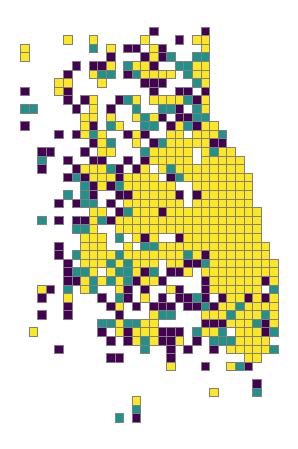

In [8]:
ax = cell_cmap.plot(column='n_schools', figsize=(12, 8), cmap='viridis', vmax=3, edgecolor="grey")
plt.autoscale(False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.to_crs(cell_cmap.crs).plot(ax=ax, color='none', edgecolor='black')
ax.axis('off')

In [9]:
gdf = gdf.to_crs(epsg=4326)

In [10]:
print(gdf.total_bounds)

[-88.63255556  41.23949886 -87.52545144  42.48597947]


In [11]:
xmin, ymin, xmax, ymax= gdf.total_bounds

In [12]:
tags = {'amenity': "school"}
osm_data = ox.geometries_from_bbox(ymax,ymin,xmax,xmin,tags)

In [13]:
osm_data = osm_data.to_crs(epsg=3395)

In [14]:
# total area for the grid
xmin, ymin, xmax, ymax= osm_data.total_bounds
# how many cells across and down
n_cells=30
cell_size = (xmax-xmin)/n_cells
# projection of the grid
crs = 'EPSG:3395'
# create the cells in a loop
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
cell_osm = gpd.GeoDataFrame(grid_cells, columns=['geometry'], 
                                 crs=crs)

/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  result[:] = values
/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/geopandas/_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out


In [15]:
merge_osm = gpd.sjoin(osm_data, cell_osm, how='left', op='within')

In [16]:
# make a simple count variable that we can sum
merge_osm['n_schools']=1
# Compute stats per grid cell -- aggregate schools to grid cells with dissolve
dissolve = merge_osm.dissolve(by="index_right", aggfunc="count")
# put this into cell
cell_osm.loc[dissolve.index, 'n_schools'] = dissolve.n_schools.values

/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/geopandas/geoseries.py:207: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/geopandas/_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'GeometryCollection'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/geopandas/_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiPolygon'.  With the exception of `A

/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/geopandas/_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiPolygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
/opt/anaconda3/envs/gpipInternship/lib/python3.9/site-packages/geopandas/_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out


(-9872658.195605192, -9737268.97742083, 5010200.683212973, 5217797.484428996)

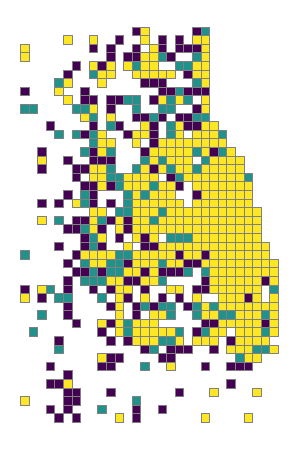

In [17]:
ax = cell_osm.plot(column='n_schools', figsize=(12, 8), cmap='viridis', vmax=3, edgecolor="grey")
plt.autoscale(False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.to_crs(cell_osm.crs).plot(ax=ax, color='none', edgecolor='black')
ax.axis('off')

In [18]:
difference = 0
diff = []
for i in range(len(cell_osm["n_schools"])):
    difference = abs(cell_osm["n_schools"][i] - cell_cmap["n_schools"][i])
    diff.append(difference)


In [19]:
cell_osm["difference"] = diff

<AxesSubplot:ylabel='Frequency'>

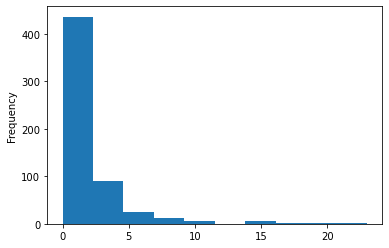

In [20]:
cell_osm["difference"].plot.hist()

In [21]:
cell_osm = cell_osm.fillna(0)

In [22]:
cell_cmap = cell_cmap.fillna(0)

In [23]:
difference = 0
diff = []
for i in range(len(cell_osm["n_schools"])):
    difference = abs(cell_osm["n_schools"][i] - cell_cmap["n_schools"][i])
    diff.append(difference)


<AxesSubplot:ylabel='Frequency'>

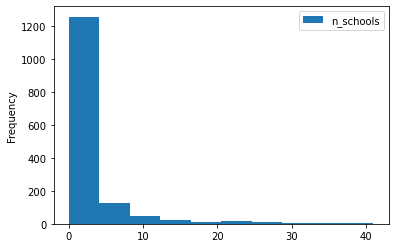

In [24]:
cell_cmap.plot.hist()

In [25]:
cell_osm["difference"] = diff

<AxesSubplot:ylabel='Frequency'>

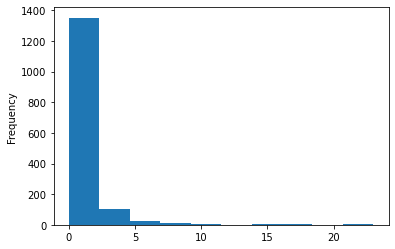

In [26]:
cell_osm["difference"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

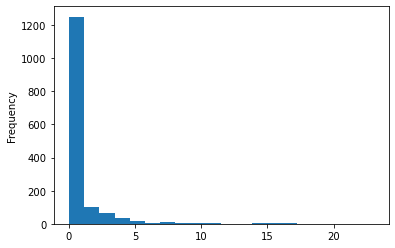

In [27]:
cell_osm["difference"].plot.hist(stacked=True, bins=20)

([<matplotlib.patches.Wedge at 0x198c38af0>,
 [Text(-0.5446851975355651, 0.9556767422019029, '0'),
  Text(-0.011488262370281171, -1.099940007376635, '1'),
  Text(0.7293026719615714, -0.8234789691726879, '2'),
  Text(0.964644958806644, -0.5286398617669009, '3'),
  Text(1.053959180206449, -0.3149127600757869, '4'),
  Text(1.0827072893472252, -0.19428053323579386, '5'),
  Text(1.0972270551828984, -0.0780563218110152, 'More than 5')],
 [Text(-0.29710101683758094, 0.5212782230192198, '66.49'),
  Text(-0.006266324929244275, -0.5999672767508917, '16.69'),
  Text(0.39780145743358436, -0.4491703468214661, '6.72'),
  Text(0.5261699775308967, -0.28834901550921865, '4.26'),
  Text(0.574886825567154, -0.17177059640497463, '2.46'),
  Text(0.5905676123712136, -0.10597119994679664, '1.13'),
  Text(0.5984874846452173, -0.04257617553328102, '2.26')])

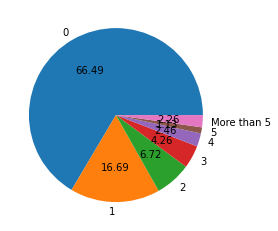

In [28]:
c1, c2, c3 , c4, c5, c6, c7= (0,0,0,0,0,0,0)

for i in range(len(diff)):
    if(diff[i] == 0):
        c1 = c1 + 1
    elif(diff[i] == 1):
        c2 = c2 + 1
    elif(diff[i] == 2):
        c3 = c3 + 1
    elif(diff[i] == 3):
        c4 = c4 + 1
    elif(diff[i] == 4):
        c5 = c5 + 1
    elif(diff[i] == 5):
        c6 = c6 + 1
    else:
        c7 = c7 + 1
        
diff_pie = [c1,c2,c3,c4,c5,c6,c7]
plt.pie(diff_pie, labels=["0", "1", "2", "3", "4", "5", "More than 5"], autopct="%.2f")